# Relatório de Análise VIII

## Identificando e Removendo Outliers

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14, 6))


In [3]:
dados = pd.read_csv('../data/aluguel/aluguel_residencial.csv', sep = ';')

<AxesSubplot:>

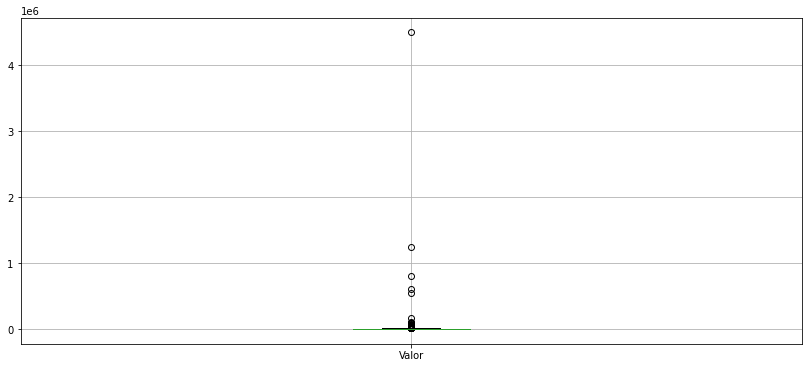

In [4]:
dados.boxplot(['Valor'])

In [5]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m²,Tipo Agregado
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [6]:
valor = dados['Valor']

In [9]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [11]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

<AxesSubplot:>

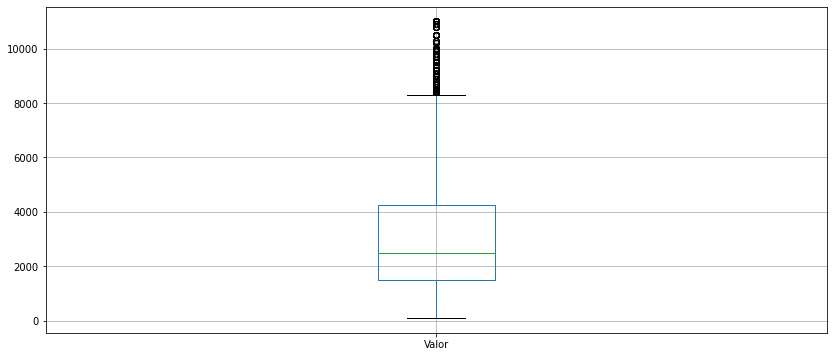

In [12]:
dados_new.boxplot(['Valor'])

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

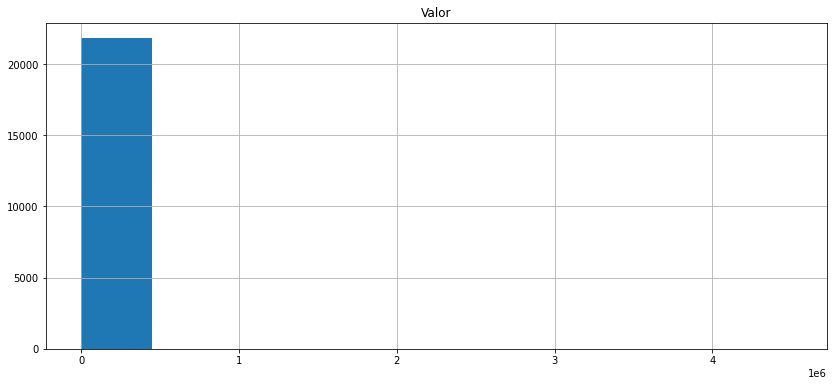

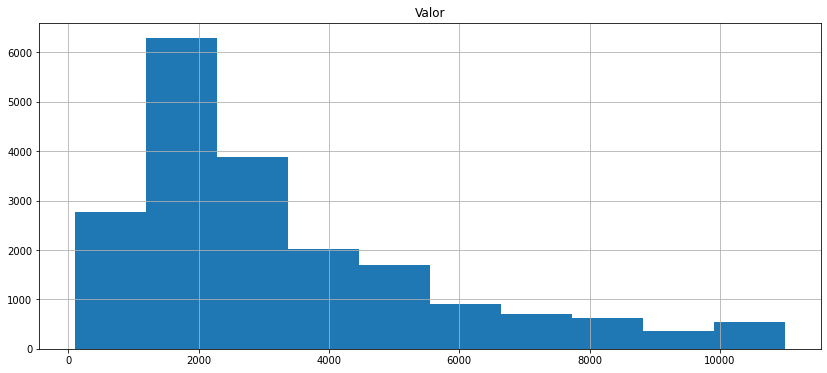

In [13]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

## Identificando e removendo Outliers (Continuação)

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

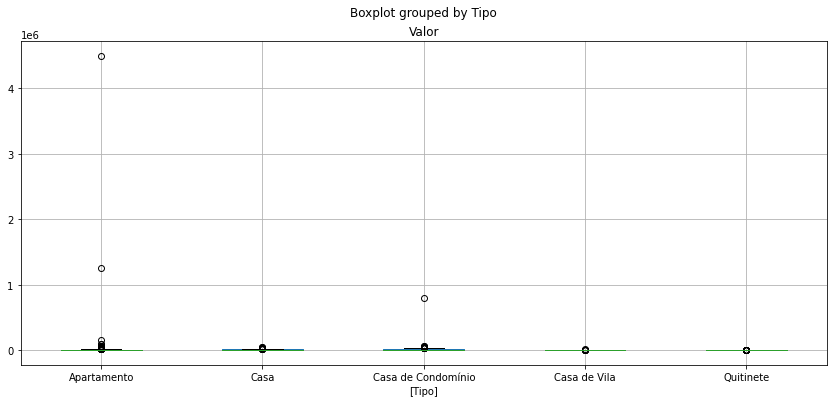

In [35]:
dados.boxplot(['Valor'], by = ['Tipo'])

In [38]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [39]:
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [40]:
grupo_tipo.groups

{'Apartamento': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 51, 52, 55, 56, 58, 59, 60, 61, 62, 63, 64, 66, 68, 70, 73, 75, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 116, 119, 120, 121, ...], 'Casa': [13, 31, 50, 54, 74, 109, 115, 123, 127, 172, 181, 202, 210, 236, 247, 261, 291, 307, 360, 385, 478, 512, 541, 550, 557, 601, 611, 624, 631, 633, 637, 641, 642, 692, 702, 787, 793, 796, 812, 813, 843, 858, 869, 880, 884, 894, 931, 942, 943, 962, 1001, 1014, 1097, 1141, 1155, 1190, 1192, 1278, 1286, 1307, 1325, 1338, 1340, 1371, 1459, 1510, 1538, 1542, 1668, 1675, 1719, 1735, 1741, 1769, 1783, 1800, 1878, 1897, 1926, 1929, 1951, 1960, 1972, 1976, 2035, 2096, 2112, 2117, 2122, 2213, 2240, 2253, 2267, 2292, 2329, 2332, 2373, 2405, 2459, 2486, ...], 'Casa de 

In [42]:
q1 = grupo_tipo.quantile(.25)
q3 = grupo_tipo.quantile(.75)
iiq = q3 - q1
limite_inferior = q1 - 1.5 * iiq
limite_superior = q3 + 1.5 * iiq

In [43]:
q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    3925.0
Casa de Vila           800.0
Quitinete              900.0
Name: Valor, dtype: float64

In [44]:
q3

Tipo
Apartamento            5000.0
Casa                   9000.0
Casa de Condomínio    16000.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [45]:
iiq

Tipo
Apartamento            3300.0
Casa                   7900.0
Casa de Condomínio    12075.0
Casa de Vila           1000.0
Quitinete               600.0
Name: Valor, dtype: float64

In [46]:
limite_inferior

Tipo
Apartamento           -3250.0
Casa                 -10750.0
Casa de Condomínio   -14187.5
Casa de Vila           -700.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [47]:
limite_superior

Tipo
Apartamento            9950.0
Casa                  20850.0
Casa de Condomínio    34112.5
Casa de Vila           3300.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [49]:
limite_superior['Casa']

20850.0

In [53]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

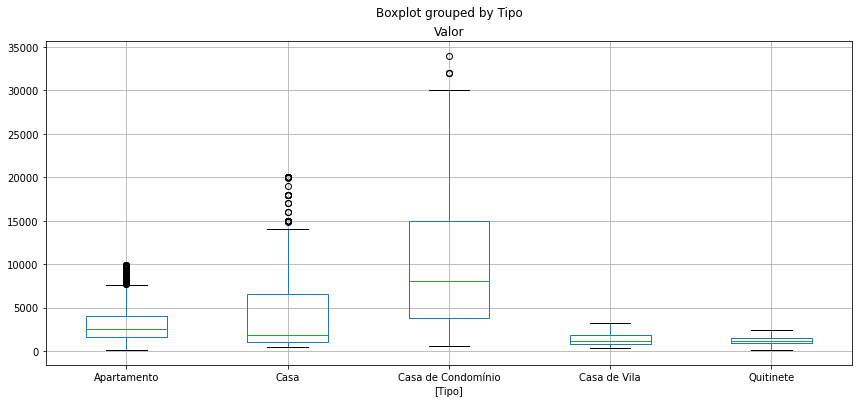

In [54]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [ ]:
dados_new.to_csv('../data/aluguel/aluguel_residencial_sem_outliers.csv', sep =';', index = False)

## Exercicios 

In [ ]:
import pandas as pd

In [24]:
dados = pd.read_csv('../data/aluguel/aluguel_amostra.csv', sep = ';')
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento
5,Apartamento,Cachambi,2,1,1,75,1400.0,715.0,0.0,18.67,Apartamento
6,Apartamento,Glória,1,0,0,52,1700.0,560.0,0.0,32.69,Apartamento
7,Apartamento,Engenho Novo,2,1,0,70,1200.0,430.0,21.0,17.14,Apartamento
8,Apartamento,Maracanã,1,1,0,59,1500.0,410.0,0.0,25.42,Apartamento
9,Apartamento,Flamengo,3,0,0,100,2500.0,980.0,105.0,25.00,Apartamento


In [30]:
valor = dados['Valor m2']

In [31]:
q1 = valor.quantile(.25)
q3 = valor.quantile(.75)
iiq = q3 - q1
limite_inferior = q1 - 1.5 * iiq
limite_superior = q3 + 1.5 * iiq

In [34]:
print(f'1° quartil: {q1}')
print(f'3° quartil: {q3}')
print(f'Intervalo interquartil: {iiq:.2f}')
print(f'Limite inferior: {limite_inferior:.2f}')
print(f'Limite superior: {limite_superior:.2f}')

1° quartil: 21.25
3° quartil: 42.31
Intervalo interquartil: 21.06
Limite inferior: -10.34
Limite superior: 73.90
